In [115]:
%matplotlib inline

import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns
from sklearn import linear_model
import scipy.stats as stats

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [2]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

raw_df = pd.read_csv("main_db/main_db.csv", decimal=',')
tmp_df = raw_df[(~raw_df.subscription_time.isna())]
no_sub = raw_df[(raw_df.subscription_time.isna())]
df = tmp_df[(tmp_df.reject_flg == 0) | ((tmp_df.reject_flg == 1) & (tmp_df.account_flg + tmp_df.utilization_flg >= 1))].copy()

In [3]:
df.shape


(41271, 66)

In [4]:
df.dtypes

Unnamed: 0                     int64
application_id                object
primary_income_dt             object
party_rk                     float64
product_code                  object
account_own_flg                int64
sch_flg                        int64
success_flg                    int64
validation_flg                 int64
reject_flg                     int64
account_flg                    int64
utilization_flg                int64
ccr_account_first_open_dt     object
dep_account_first_open_dt     object
cur_account_first_open_dt     object
sav_account_first_open_dt     object
cln_account_first_open_dt     object
pos_account_first_open_dt     object
subscription_time            float64
channel_desc                  object
region_size                   object
trial_type                    object
metall_flg                     int64
age_segment                   object
res_segment                   object
open_cc_flg                    int64
util_cc_flg                    int64
o

In [5]:
df.describe()

,Unnamed: 0,party_rk,account_own_flg,sch_flg,success_flg,validation_flg,reject_flg,account_flg,utilization_flg,subscription_time,metall_flg,open_cc_flg,util_cc_flg,open_cn_flg,util_cn_flg,open_sav_flg,util_sav_flg,open_dep_flg,util_dep_flg,open_mb_flg,util_mb_flg,open_inv_flg,util_inv_flg,in_5ms_cnt,in_3ms_cnt,in_1ms_cnt,out_5ms_puc_cnt,out_3ms_puc_cnt,out_1ms_puc_cnt,out_5ms_uch_cnt,out_3ms_uch_cnt,out_1ms_uch_cnt,out_5ms_all_cnt,out_3ms_all_cnt,out_1ms_all_cnt,in_total_5ms_amt,in_total_3ms_amt,in_total_1ms_amt,out_total_5ms_amt,out_total_3ms_amt,out_total_1ms_amt,lk_flg,inkas_flg,cash_out_flg,vzr_flg,concierge_flg,cb_flg,invest_flg,mobile_flg,out_c2c_flg,car_ins_flg,percent_flg
count,41271.000000,4.127100e+04,41271.000000,41271.000000,41271.000000,41271.000000,41271.000000,41271.000000,41271.000000,4.127100e+04,41271.000000,41271.000000,41271.000000,41271.000000,41271.000000,41271.000000,41271.000000,41271.000000,41271.000000,41271.000000,41271.00000,41271.000000,41271.000000,41271.000000,41243.000000,41242.000000,41271.000000,41243.000000,41242.000000,41271.000000,41243.000000,41242.000000,41271.000000,41243.000000,41242.000000,4.127100e+04,4.127100e+04,4.127100e+04,4.127100e+04,4.127100e+04,4.127100e+04,41271.000000,41271.000000,41271.000000,41271.000000,41271.000000,41271.000000,41271.000000,41271.0,41271.000000,41271.000000,41271.000000
mean,37071.367837,7.030979e+08,0.889220,0.508129,0.363694,0.007899,0.430617,0.975188,0.350319,4.518954e+06,0.896731,0.057595,0.043929,0.027792,0.022825,0.130721,0.089142,0.003416,0.003344,0.098689,0.06702,0.129486,0.053209,229.058782,180.955532,122.794336,203.025466,156.676406,104.292808,11.350658,8.715176,5.652708,98.747837,77.997333,52.721158,4.788639e+05,3.856990e+05,2.721781e+05,4.769492e+05,3.837673e+05,2.707546e+05,0.014562,0.000024,0.008117,0.007560,0.002496,0.007051,0.122919,0.0,0.033074,0.004725,0.008553
std,21283.834509,2.496190e+08,0.313863,0.499940,0.481068,0.088526,0.495169,0.155553,0.477075,2.769069e+06,0.304313,0.232979,0.204940,0.164378,0.149346,0.337099,0.284953,0.058351,0.057729,0.298248,0.25006,0.335741,0.224453,311.053183,245.452705,172.361231,261.626964,196.446997,127.023637,21.069911,16.288639,11.178880,138.575469,108.080093,72.962234,1.357970e+06,1.202717e+06,1.053646e+06,1.355033e+06,1.200097e+06,1.050303e+06,0.119794,0.004922,0.089730,0.086619,0.049895,0.083674,0.328348,0.0,0.178832,0.068576,0.092088
min,1.000000,2.310600e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.461511e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,18735.000000,5.494492e+08,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.678398e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,26.000000,22.000000,16.000000,9.000000,7.000000,4.000000,0.000000,0.000000,0.000000,8.000000,7.000000,5.000000,1.957143e+04,1.566809e+04,1.031764e+04,1.913693e+04,1.527400e+04,1.022180e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,37136.000000,7.636295e+08,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.387004e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,125.000000,103.000000,73.000000,97.000000,81.000000,58.000000,4.000000,3.000000,2.000000,50.000000,41.000000,28.000000,1.420364e+05,1.158778e+05,8.011240e+04,1.403039e+05,1.149156e+05,7.962111e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,55502.500000,9.066672e+08,1.000000,1.000000,1.000000,0.000000,1.000000,1.0

In [6]:
df["primary_income_dt"] = pd.to_datetime(df["primary_income_dt"])

df["ccr_account_first_open_dt"] = pd.to_datetime(df["ccr_account_first_open_dt"])
df["dep_account_first_open_dt"] = pd.to_datetime(df["dep_account_first_open_dt"])
df["cur_account_first_open_dt"] = pd.to_datetime(df["cur_account_first_open_dt"])
df["sav_account_first_open_dt"] = pd.to_datetime(df["sav_account_first_open_dt"])
df["cln_account_first_open_dt"] = pd.to_datetime(df["cln_account_first_open_dt"])
df["pos_account_first_open_dt"] = pd.to_datetime(df["pos_account_first_open_dt"])
df['any_feature'] = df.iloc[:, -11:-1].sum(axis=1)
df["money_out"] = df["out_total_5ms_amt"]
df["money_in"] = df["in_total_5ms_amt"]
df["inout"] = df["money_out"] / df["money_in"]

df["trial_months"] = df.trial_type.str.extract('(\d+)')
df["trial_months"] = pd.to_numeric(df["trial_months"])
df["trial_months"] = df["trial_months"].fillna(0)

# df[-6:-1]
df['cc_flg'] = df['open_cc_flg'] * df['util_cc_flg']
df['cn_flg'] = df['open_cn_flg'] * df['util_cn_flg']
df['sav_flg'] = df['open_sav_flg'] * df['util_sav_flg']
df['dep_flg'] = df['open_dep_flg'] * df['util_dep_flg']
df['inv_flg'] = df['open_inv_flg'] * df['util_inv_flg']
df['mb_flg'] = df['open_mb_flg'] * df['util_mb_flg']
df["pos_flg"] = np.where(df["pos_account_first_open_dt"].isna(), 0, 1)

df['any_open'] = df['cc_flg'] + df['cn_flg'] + df['sav_flg'] + df['dep_flg'] + \
                 df['inv_flg'] + df['mb_flg'] + df["pos_flg"]
df['bank_and_feature'] = df['any_open'] + df['any_feature']

df["subscription_days"] = df["subscription_time"] // (3600 * 24)
df["true_subscription_days"] = np.where(df["subscription_days"] > 30 * df["trial_months"], 
                                        df["subscription_days"] - 30 * df["trial_months"], 0)
df["true_subscription_months"] = round(df["true_subscription_days"]/30)
df["age_rank"] = df["age_segment"].rank(method="dense")


In [7]:
df["bank_and_feature"].value_counts()

bank_and_feature
0     25059
1     10650
2      3875
3      1246
4       348
5        77
6        11
7         3
8         1
10        1
Name: count, dtype: int64

In [8]:
main_data = df[[#'Unnamed: 0', 'application_id', 'primary_income_dt', 'party_rk',
       'product_code', 'account_own_flg', 'sch_flg', 'success_flg',
       'validation_flg', 'reject_flg', 'account_flg', 'utilization_flg',
       'ccr_account_first_open_dt', 'dep_account_first_open_dt',
       'cur_account_first_open_dt', 'sav_account_first_open_dt',
       'cln_account_first_open_dt', 'pos_account_first_open_dt',
       'subscription_time', 'channel_desc', 'region_size', 'trial_type',
       'metall_flg', 'age_segment', 'res_segment', 'open_cc_flg',
       'util_cc_flg', 'open_cn_flg', 'util_cn_flg', 'open_sav_flg',
       'util_sav_flg', 'open_dep_flg', 'util_dep_flg', 'open_mb_flg',
       'util_mb_flg', 'open_inv_flg', 'util_inv_flg', 'in_5ms_cnt',
       #'in_3ms_cnt', 'in_1ms_cnt', 'out_5ms_puc_cnt', 'out_3ms_puc_cnt',
       #'out_1ms_puc_cnt', 'out_5ms_uch_cnt', 'out_3ms_uch_cnt',
       #'out_1ms_uch_cnt', 'out_5ms_all_cnt', 'out_3ms_all_cnt',
       #'out_1ms_all_cnt', 'in_total_5ms_amt', 'in_total_3ms_amt',
       #'in_total_1ms_amt', 'out_total_5ms_amt', 'out_total_3ms_amt',
       #'out_total_1ms_amt', 
        'lk_flg', 'inkas_flg', 'cash_out_flg', 'vzr_flg',
       'concierge_flg', 'cb_flg', 'invest_flg', 'mobile_flg', 'out_c2c_flg',
       'car_ins_flg', 'percent_flg', 'subscription_days', 'age_rank']].copy()

main_data = main_data[main_data.age_segment != "Пусто"]

In [9]:
numeric_data = main_data.select_dtypes(numerics)
numeric_data = numeric_data.fillna(0)

In [10]:
corr_main = numeric_data.corr()
age_corr = corr_main[["age_rank"]]

In [11]:
df.columns

Index(['Unnamed: 0', 'application_id', 'primary_income_dt', 'party_rk',
       'product_code', 'account_own_flg', 'sch_flg', 'success_flg',
       'validation_flg', 'reject_flg', 'account_flg', 'utilization_flg',
       'ccr_account_first_open_dt', 'dep_account_first_open_dt',
       'cur_account_first_open_dt', 'sav_account_first_open_dt',
       'cln_account_first_open_dt', 'pos_account_first_open_dt',
       'subscription_time', 'channel_desc', 'region_size', 'trial_type',
       'metall_flg', 'age_segment', 'res_segment', 'open_cc_flg',
       'util_cc_flg', 'open_cn_flg', 'util_cn_flg', 'open_sav_flg',
       'util_sav_flg', 'open_dep_flg', 'util_dep_flg', 'open_mb_flg',
       'util_mb_flg', 'open_inv_flg', 'util_inv_flg', 'in_5ms_cnt',
       'in_3ms_cnt', 'in_1ms_cnt', 'out_5ms_puc_cnt', 'out_3ms_puc_cnt',
       'out_1ms_puc_cnt', 'out_5ms_uch_cnt', 'out_3ms_uch_cnt',
       'out_1ms_uch_cnt', 'out_5ms_all_cnt', 'out_3ms_all_cnt',
       'out_1ms_all_cnt', 'in_total_5ms_amt', 

In [12]:
age_corr

,age_rank
account_own_flg,-0.136620
sch_flg,0.057624
success_flg,0.063744
validation_flg,0.012089
reject_flg,-0.130423
account_flg,0.001202
utilization_flg,0.039153
subscription_time,0.132280
metall_flg,-0.137533
open_cc_flg,-0.003457


<Axes: >

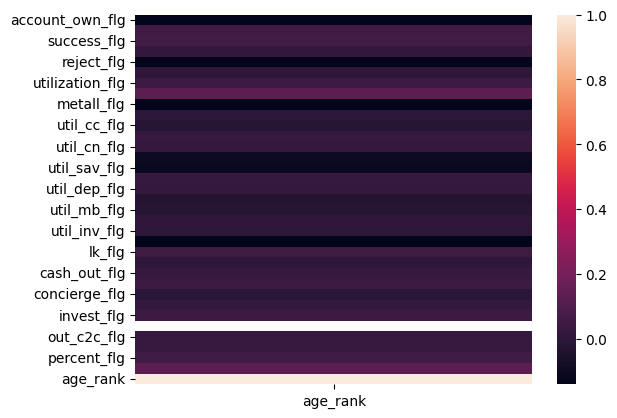

In [13]:
age_corr.fillna(0)
age_corr_arr = np.asarray(age_corr).reshape(age_corr.shape[0], 1)
#age_corr_arr.shape
sns.heatmap(age_corr)

In [14]:
transaction_data = df[[#'Unnamed: 0', 'application_id', 'primary_income_dt', 'party_rk',
       #'product_code', 'account_own_flg', 
       'sch_flg', 'success_flg',
       'validation_flg', 'reject_flg', 'account_flg', 'utilization_flg',
       #'ccr_account_first_open_dt', 'dep_account_first_open_dt',
       #'cur_account_first_open_dt', 'sav_account_first_open_dt',
       #'cln_account_first_open_dt', 'pos_account_first_open_dt',
       'subscription_time', #'channel_desc', 'region_size', 'trial_type',
       'metall_flg', #'age_segment', 'res_segment', 'open_cc_flg',
       #'util_cc_flg', 'open_cn_flg', 'util_cn_flg', 'open_sav_flg',
       #'util_sav_flg', 'open_dep_flg', 'util_dep_flg', 'open_mb_flg',
       #'util_mb_flg', 'open_inv_flg', 'util_inv_flg', 'in_5ms_cnt',
       #'in_3ms_cnt', 'in_1ms_cnt', 'out_5ms_puc_cnt', 'out_3ms_puc_cnt',
       #'out_1ms_puc_cnt', 'out_5ms_uch_cnt', 'out_3ms_uch_cnt',
       #'out_1ms_uch_cnt', 'out_5ms_all_cnt', 'out_3ms_all_cnt',
       #'out_1ms_all_cnt', 'in_total_5ms_amt', 'in_total_3ms_amt',
       #'in_total_1ms_amt', 'out_total_5ms_amt', 'out_total_3ms_amt',
       #'out_total_1ms_amt', 'lk_flg', 'inkas_flg', 'cash_out_flg', 'vzr_flg',
       #'concierge_flg', 'cb_flg', 'invest_flg', 'mobile_flg', 'out_c2c_flg',
       'car_ins_flg', 'percent_flg', 'trial_months', 'any_feature',
       'money_out', 'money_in', 'inout', 'cc_flg', 'cn_flg', 'sav_flg',
       'dep_flg', 'inv_flg', 'mb_flg', 'any_open', 'subscription_days',
       'true_subscription_days', 'true_subscription_months', 'age_rank']]

#transaction_data = transaction_data[transaction_data.age_segment != "Пусто"]

<Axes: >

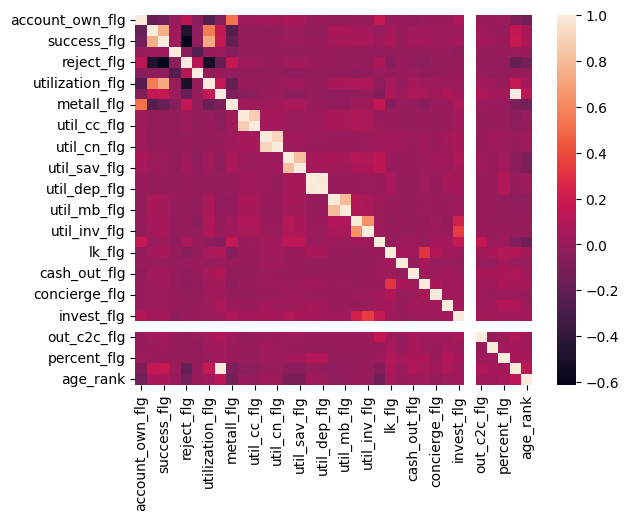

In [15]:
numeric_trans = transaction_data.select_dtypes(numerics)
numeric_trans = numeric_trans.fillna(0)
corr_trans = numeric_data.corr()
sns.heatmap(corr_trans)
#age_corr = corr_main[["age_rank"]]

In [16]:
corr_trans

,account_own_flg,sch_flg,success_flg,validation_flg,reject_flg,account_flg,utilization_flg,subscription_time,metall_flg,open_cc_flg,util_cc_flg,open_cn_flg,util_cn_flg,open_sav_flg,util_sav_flg,open_dep_flg,util_dep_flg,open_mb_flg,util_mb_flg,open_inv_flg,util_inv_flg,in_5ms_cnt,lk_flg,inkas_flg,cash_out_flg,vzr_flg,concierge_flg,cb_flg,invest_flg,mobile_flg,out_c2c_flg,car_ins_flg,percent_flg,subscription_days,age_rank
account_own_flg,1.000000,-0.181761,-0.143817,-0.000896,0.133734,-0.057130,-0.246610,-0.080744,0.520808,0.018602,0.019954,0.032134,0.028813,0.070537,0.052574,0.011241,0.010813,-0.017371,-0.015237,0.005675,-0.012796,0.165327,-0.010200,0.002058,-0.019666,-0.000665,0.008027,0.007698,0.089305,NaN,0.005496,0.006320,0.016117,-0.082373,-0.136620
sch_flg,-0.181761,1.000000,0.748396,0.027716,-0.469090,-0.034001,0.559242,0.151545,-0.256460,-0.017522,-0.011994,-0.010359,-0.007461,0.017871,0.007110,-0.015678,-0.015334,0.063148,0.056854,0.048067,0.044180,-0.001649,0.044480,0.005664,0.031618,0.027709,0.029347,0.016188,0.020509,NaN,0.031679,0.011438,-0.000281,0.152165,0.057624
success_flg,-0.143817,0.748396,1.000000,0.022551,-0.610140,-0.025380,0.719172,0.178302,-0.191680,-0.009318,0.000082,-0.001004,0.001103,0.029152,0.018381,-0.002115,-0.002043,0.050341,0.052830,0.055506,0.058030,0.019423,0.063091,-0.004317,0.051082,0.038672,0.030542,0.021264,0.038136,NaN,0.038762,0.019845,0.008566,0.178390,0.063744
validation_flg,-0.000896,0.027716,0.022551,1.000000,-0.047112,-0.245712,0.003132,0.014878,-0.057686,-0.012923,-0.008655,-0.008982,-0.006728,-0.016911,-0.018619,-0.005671,-0.005600,0.000722,-0.000914,-0.015138,-0.014323,-0.021044,-0.008945,-0.000515,-0.003777,-0.008412,-0.004550,0.000606,-0.030583,NaN,-0.001535,-0.006124,-0.001849,0.015246,0.012089
reject_flg,0.133734,-0.469090,-0.610140,-0.047112,1.000000,0.123281,-0.501048,-0.185488,0.159040,0.025717,0.026115,0.001070,0.001029,0.036906,0.038374,0.007836,0.009321,-0.000068,-0.009801,-0.002165,-0.008663,0.077499,-0.064029,0.006525,-0.026252,-0.041315,-0.016825,-0.014702,0.009041,NaN,-0.014248,-0.011899,-0.010811,-0.186800,-0.130423
account_flg,-0.057130,-0.034001,-0.025380,-0.245712,0.123281,1.000000,-0.009895,0.005269,-0.015610,-0.017561,-0.013158,-0.015436,-0.014357,-0.025539,-0.022948,-0.010181,-0.010560,-0.014672,-0.012368,-0.040356,-0.015630,-0.003664,-0.015282,0.000907,0.004389,-0.021616,-0.012908,0.001647,0.008612,NaN,0.004398,-0.023486,-0.015410,0.005367,0.001202
utilization_flg,-0.246610,0.559242,0.719172,0.003132,-0.501048,-0.009895,1.000000,0.173696,-0.179676,-0.003300,0.002716,-0.004540,0.001143,0.026960,0.019385,-0.005746,-0.005765,0.069872,0.073862,0.085603,0.079025,-0.032509,0.058438,-0.004188,0.052559,0.029178,0.022778,0.018466,0.016700,NaN,0.032211,0.018979,0.000702,0.173866,0.039153
subscription_time,-0.080744,0.151545,0.178302,0.014878,-0.185488,0.005269,0.173696,1.000000,-0.094995,-0.043601,-0.033849,-0.003160,0.001677,-0.036646,-0.036702,-0.005584,-0.006614,-0.027363,-0.023061,-0.015301,0.003398,-0.071098,0.084828,0.018224,0.086593,0.054112,0.028442,0.088264,0.034210,NaN,0.091775,0.039454,0.048272,0.999925,0.132280
metall_flg,0.520808,-0.256460,-0.191680,-0.057686,0.159040,-0.015610,-0.179676,-0.094995,1.000000,0.020849,0.025726,0.029126,0.025284,0.067857,0.057061,0.003681,0.003173,-0.023210,-0.024966,0.036976,0.028311,0.160871,-0.064049,0.002001,-0.012119,-0.045335,0.003142,0.009938,0.088336,NaN,0.015001,0.002146,0.006308,-0.096600,-0.137533
open_cc_flg,0.018602,-0.017522,-0.009318,-0.012923,0.025717,-0.017561,-0.003300,-0.043601,0.020849,1.000000,0.866599,0.054865,0.050100,0.015825,0.014546,0.022267,0.022940,0.069190,0.054220,0.081856,0.062633,0.000195,0.002291,-0.001417,-0.007545,0.000980,-0.001438,0.007464,0.039698,NaN,-0.012606,0.001719,-0.004279,-0.044160,-0.003457


In [17]:
corr_trans["age_rank"]

account_own_flg     -0.136620
sch_flg              0.057624
success_flg          0.063744
validation_flg       0.012089
reject_flg          -0.130423
account_flg          0.001202
utilization_flg      0.039153
subscription_time    0.132280
metall_flg          -0.137533
open_cc_flg         -0.003457
util_cc_flg         -0.023449
open_cn_flg          0.023765
util_cn_flg          0.018747
open_sav_flg        -0.104878
util_sav_flg        -0.105887
open_dep_flg         0.021286
util_dep_flg         0.017442
open_mb_flg         -0.033887
util_mb_flg         -0.020602
open_inv_flg         0.005217
util_inv_flg        -0.005221
in_5ms_cnt          -0.140841
lk_flg               0.047852
inkas_flg           -0.001046
cash_out_flg         0.024595
vzr_flg              0.039420
concierge_flg       -0.011952
cb_flg               0.017920
invest_flg           0.043789
mobile_flg                NaN
out_c2c_flg          0.020420
car_ins_flg          0.025209
percent_flg          0.054738
subscripti

In [18]:
df.fillna(0)
sub_ppl = df[(~df.trial_type.isna()) & (df.age_segment != "14-17") & (df.age_segment != "0-13") & (df.reject_flg != 1)]
non_sub_ppl = df[(df.trial_type.isna()) & (df.age_segment != "14-17") & (df.age_segment != "0-13") & (df.reject_flg != 1)] 

Text(0.5, 0, 'Subscription days')

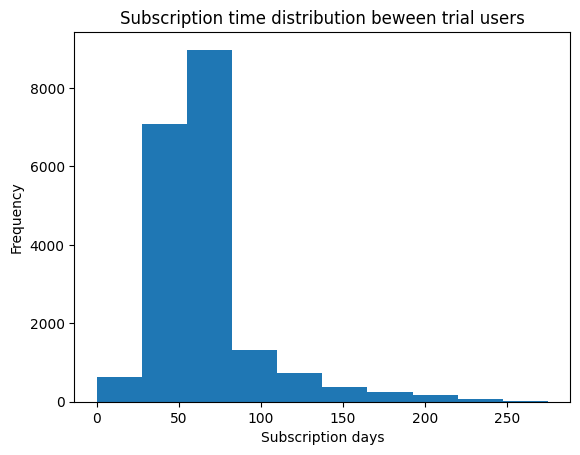

In [19]:
sd_sub = sub_ppl["subscription_days"].plot(kind="hist", title="Subscription time distribution beween trial users")
sd_sub.set_xlabel("Subscription days")

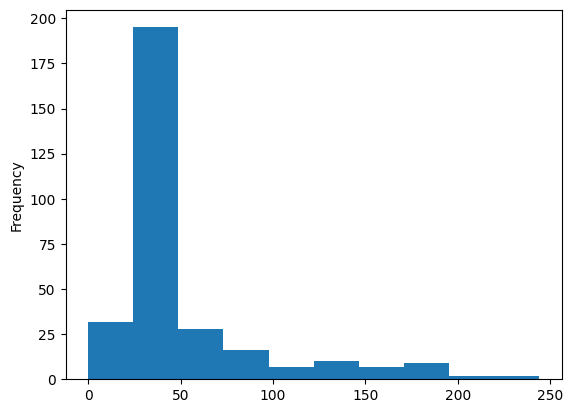

In [20]:
sd_nonsub = non_sub_ppl["subscription_days"].plot(kind="hist")

In [21]:
sub_ppl["age_segment"].value_counts()

age_segment
Пусто    6098
18-22    4068
26-30    2131
31-35    1954
23-25    1440
36-40    1424
41-45     986
46-50     644
51-55     358
56-60     233
61-65     139
65+       123
Name: count, dtype: int64

In [22]:
non_sub_ppl["age_segment"].value_counts()

age_segment
Пусто    84
18-22    84
26-30    42
31-35    35
23-25    33
41-45     8
36-40     8
46-50     7
51-55     6
65+       1
Name: count, dtype: int64

<Axes: title={'center': 'Usability of features among trial users'}, ylabel='Frequency'>

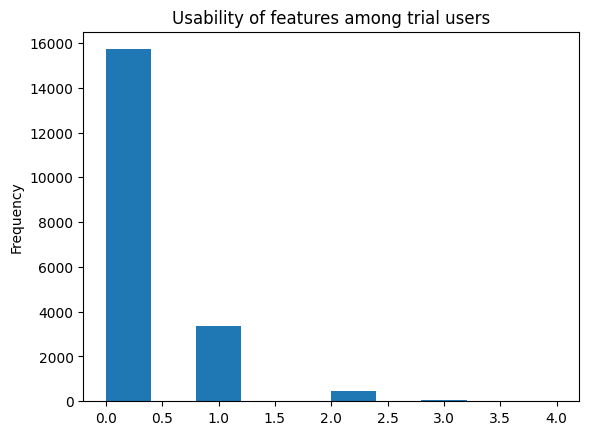

In [23]:
sub_ppl["any_feature"].plot(kind="hist", title="Usability of features among trial users")

<Axes: title={'center': 'Usability of features among non-trial users'}, ylabel='Frequency'>

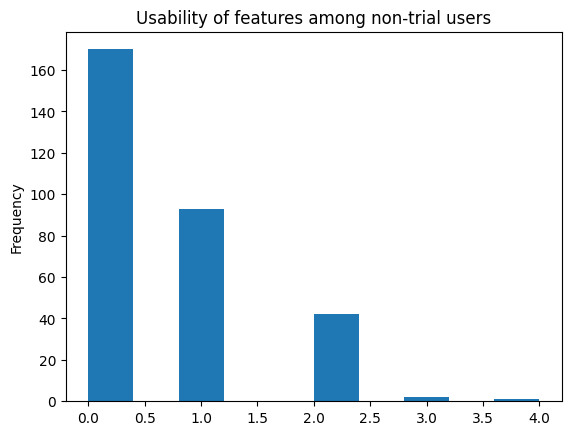

In [24]:
non_sub_ppl["any_feature"].plot(kind="hist", title="Usability of features among non-trial users")

<Axes: ylabel='Frequency'>

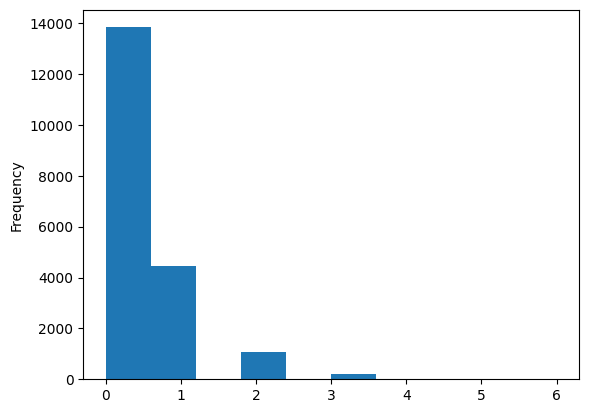

In [25]:
sub_ppl["any_open"].plot(kind="hist")

<Axes: ylabel='Frequency'>

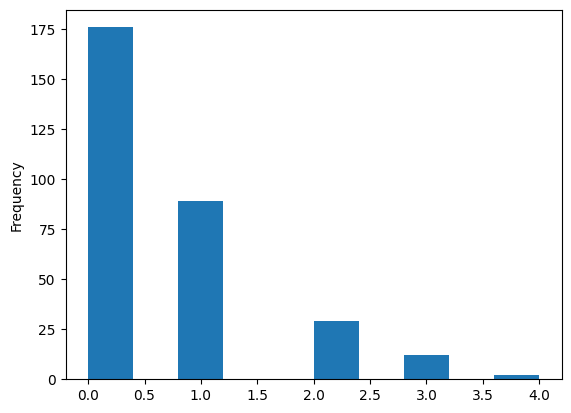

In [26]:
non_sub_ppl["any_open"].plot(kind="hist")

In [27]:
non_sub_ppl["util_inv_flg"].value_counts()

util_inv_flg
0    285
1     23
Name: count, dtype: int64

In [28]:
sub_ppl["util_inv_flg"].value_counts()

util_inv_flg
0    18475
1     1128
Name: count, dtype: int64

In [29]:
non_sub_ppl["region_size"].value_counts()

region_size
ГОРОД                      147
МОСКВА                      47
ГОРОД-МИЛЛИОННИК            47
СЕЛО                        15
неизвестно                  14
ПОСЕЛОК                     13
САНКТ-ПЕТЕРБУРГ             12
ПОСЕЛОК ГОРОДСКОГО ТИПА      7
ДЕРЕВНЯ                      5
Name: count, dtype: int64

In [30]:
sub_ppl["region_size"].value_counts()

region_size
ГОРОД                      8817
ГОРОД-МИЛЛИОННИК           2286
неизвестно                 2198
СЕЛО                       1658
МОСКВА                     1413
ПОСЕЛОК                    1133
ПОСЕЛОК ГОРОДСКОГО ТИПА     669
ДЕРЕВНЯ                     644
САНКТ-ПЕТЕРБУРГ             545
Name: count, dtype: int64

In [31]:
sub_ppl["out_total_5ms_amt"].describe()

count    1.960300e+04
mean     4.877725e+05
std      1.289701e+06
min      0.000000e+00
25%      1.468447e+04
50%      1.312824e+05
75%      4.965368e+05
max      4.933554e+07
Name: out_total_5ms_amt, dtype: float64

In [32]:
non_sub_ppl["out_total_5ms_amt"].describe()

count    3.080000e+02
mean     2.355222e+06
std      3.170282e+06
min      0.000000e+00
25%      6.244384e+05
50%      1.269023e+06
75%      2.652637e+06
max      2.125711e+07
Name: out_total_5ms_amt, dtype: float64

In [33]:
df.columns

Index(['Unnamed: 0', 'application_id', 'primary_income_dt', 'party_rk',
       'product_code', 'account_own_flg', 'sch_flg', 'success_flg',
       'validation_flg', 'reject_flg', 'account_flg', 'utilization_flg',
       'ccr_account_first_open_dt', 'dep_account_first_open_dt',
       'cur_account_first_open_dt', 'sav_account_first_open_dt',
       'cln_account_first_open_dt', 'pos_account_first_open_dt',
       'subscription_time', 'channel_desc', 'region_size', 'trial_type',
       'metall_flg', 'age_segment', 'res_segment', 'open_cc_flg',
       'util_cc_flg', 'open_cn_flg', 'util_cn_flg', 'open_sav_flg',
       'util_sav_flg', 'open_dep_flg', 'util_dep_flg', 'open_mb_flg',
       'util_mb_flg', 'open_inv_flg', 'util_inv_flg', 'in_5ms_cnt',
       'in_3ms_cnt', 'in_1ms_cnt', 'out_5ms_puc_cnt', 'out_3ms_puc_cnt',
       'out_1ms_puc_cnt', 'out_5ms_uch_cnt', 'out_3ms_uch_cnt',
       'out_1ms_uch_cnt', 'out_5ms_all_cnt', 'out_3ms_all_cnt',
       'out_1ms_all_cnt', 'in_total_5ms_amt', 

In [34]:
urban = df[(df.region_size == "ГОРОД-МИЛЛИОННИК") | (df.region_size == "МОСКВА") | (df.region_size == "САНКТ-ПЕТЕРБУРГ") | (df.region_size == "ГОРОД")]
suburb = df[(df.region_size != "ГОРОД-МИЛЛИОННИК") & (df.region_size != "МОСКВА") & (df.region_size != "САНКТ-ПЕТЕРБУРГ") | (df.region_size != "ГОРОД")]

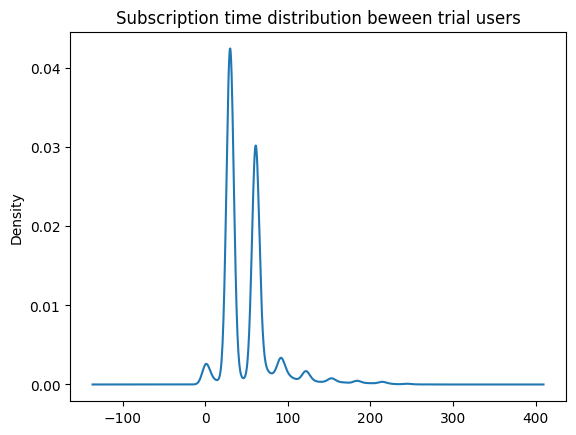

In [35]:
sd_sub = urban["subscription_days"].plot(kind="kde", title="Subscription time distribution beween trial users")

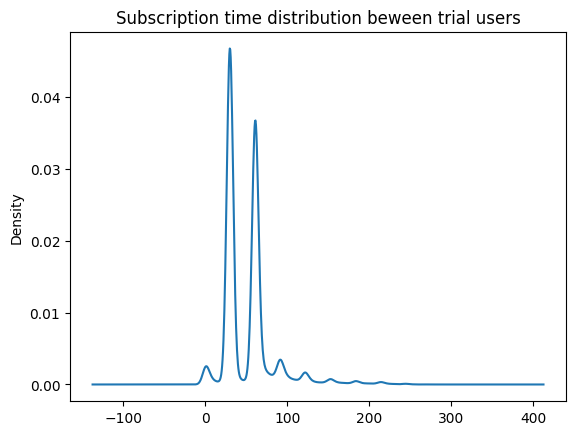

In [36]:
sd_sub1 = suburb["subscription_days"].plot(kind="kde", title="Subscription time distribution beween trial users")

In [37]:
df['channel_desc'].value_counts()

channel_desc
МБ     35859
Web     5412
Name: count, dtype: int64

In [38]:
df['res_segment'].value_counts()

res_segment
РФ            30398
Пусто          9342
Восток СНГ      933
Запад СНГ       326
Остальное       261
Name: count, dtype: int64

In [39]:
sng = df[(df.res_segment != "Пусто") & (df.res_segment != "РФ")]
rf = df[(df.res_segment == "РФ")]
sng["subscription_days"].describe()

count    1531.000000
mean       60.099935
std        34.593491
min         0.000000
25%        30.000000
50%        61.000000
75%        61.000000
max       244.000000
Name: subscription_days, dtype: float64

In [40]:
rf["subscription_days"].describe()

count    30398.000000
mean        50.915290
std         32.405383
min          0.000000
25%         30.000000
50%         31.000000
75%         61.000000
max        275.000000
Name: subscription_days, dtype: float64

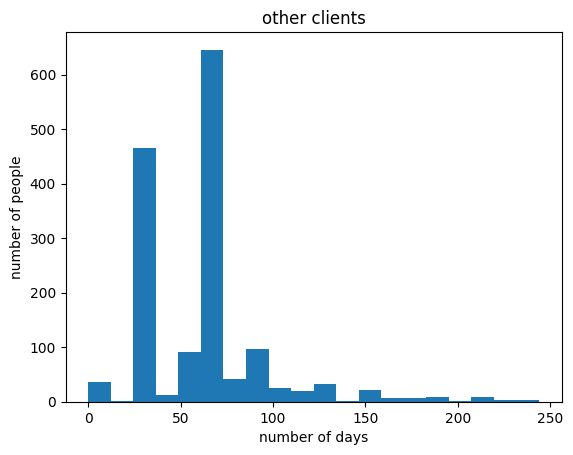

In [41]:
sng_sub = sng["subscription_days"].plot(kind="hist",bins=20, title="other clients", ylabel="number of people", xlabel="number of days")

<Axes: title={'center': 'Russian clients'}, xlabel='number of days', ylabel='number of people'>

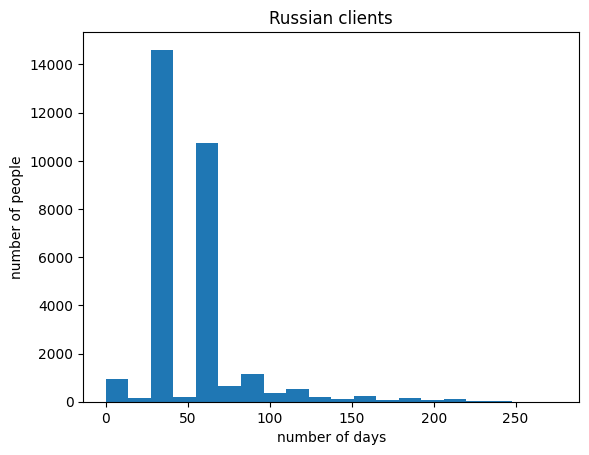

In [42]:
rf["subscription_days"].plot(kind="hist",bins=20, title="Russian clients", ylabel="number of people", xlabel="number of days")

In [43]:
rf["age_segment"].value_counts() / rf.shape[0]

age_segment
18-22    0.245970
14-17    0.230805
26-30    0.114021
31-35    0.099743
23-25    0.081979
36-40    0.069643
41-45    0.044608
Пусто    0.043292
46-50    0.028226
51-55    0.016185
56-60    0.010066
61-65    0.006349
65+      0.006086
0-13     0.003027
Name: count, dtype: float64

In [44]:
sng["age_segment"].value_counts() / sng.shape[0]

age_segment
18-22    0.308948
26-30    0.197910
23-25    0.137818
31-35    0.121489
36-40    0.075114
41-45    0.062704
46-50    0.033965
14-17    0.026780
51-55    0.013717
61-65    0.004572
Пусто    0.003919
56-60    0.003919
65+      0.001306
0-13     0.000653
Name: count, dtype: float64

In [45]:
df["any_open"].value_counts()

any_open
0    28883
1     9614
2     2271
3      431
4       66
5        5
6        1
Name: count, dtype: int64

In [46]:
res_df = df
no_acc = res_df[(res_df.any_open == 0)]
acc = res_df[res_df.any_open > 0]
acc["any_open"].corr(acc["true_subscription_months"])

-0.011521419529010762

In [47]:
no_acc_age = no_acc[no_acc.age_segment != "Пусто"]["age_segment"]
acc_age = acc[acc.age_segment != "Пусто"]["age_segment"]
no_acc_age.value_counts() / no_acc_age.shape[0]

age_segment
18-22    0.247590
14-17    0.234476
26-30    0.121640
31-35    0.106580
23-25    0.085032
36-40    0.075579
41-45    0.049861
46-50    0.031557
51-55    0.018906
56-60    0.011816
61-65    0.007275
65+      0.006812
0-13     0.002410
Name: count, dtype: float64

In [48]:
acc_age.value_counts() / acc_age.shape[0]

age_segment
18-22    0.288800
14-17    0.221225
26-30    0.126731
31-35    0.101695
23-25    0.096156
36-40    0.066578
41-45    0.041653
46-50    0.025368
51-55    0.011632
56-60    0.006314
61-65    0.004763
0-13     0.004542
65+      0.004431
Name: count, dtype: float64

<Axes: title={'center': 'People with no accounts open'}, xlabel='number of days', ylabel='number of people'>

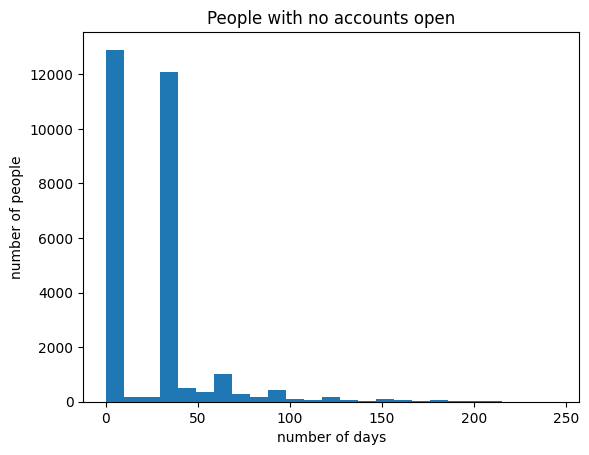

In [49]:
no_acc["true_subscription_days"].plot(kind="hist", bins=25,title="People with no accounts open", ylabel="number of people", xlabel="number of days")

<Axes: title={'center': 'People with accounts open'}, xlabel='number of days', ylabel='number of people'>

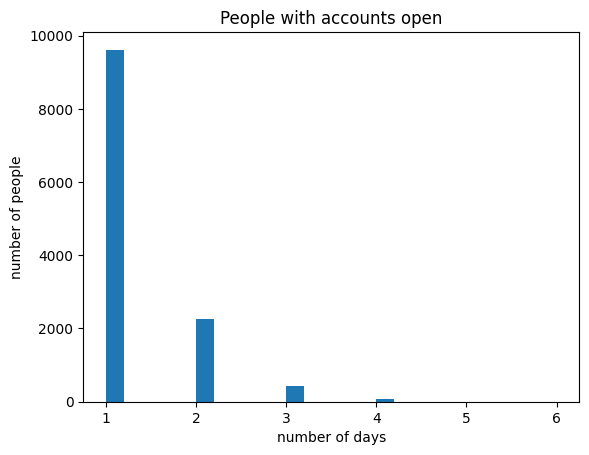

In [50]:
acc["any_open"].plot(kind="hist", bins=25,title="People with accounts open", ylabel="number of people", xlabel="number of days")

In [51]:
acc["true_subscription_days"].describe()

count    12388.000000
mean        21.336858
std         33.986351
min          0.000000
25%          0.000000
50%          0.000000
75%         31.000000
max        242.000000
Name: true_subscription_days, dtype: float64

In [52]:
no_acc["subscription_days"].describe()

count    28883.000000
mean        52.554444
std         30.731359
min          0.000000
25%         30.000000
50%         60.000000
75%         61.000000
max        275.000000
Name: subscription_days, dtype: float64

In [53]:
no_acc_old = res_df[(res_df.any_open == 0) & (res_df.age_segment != "14-17") & (res_df.age_segment != "Пусто")]
acc_old = res_df[(res_df.any_open != 0) & (res_df.age_segment != "14-17") & (res_df.age_segment != "Пусто")]

<Axes: title={'center': 'People with no accounts open'}, xlabel='number of months', ylabel='number of people'>

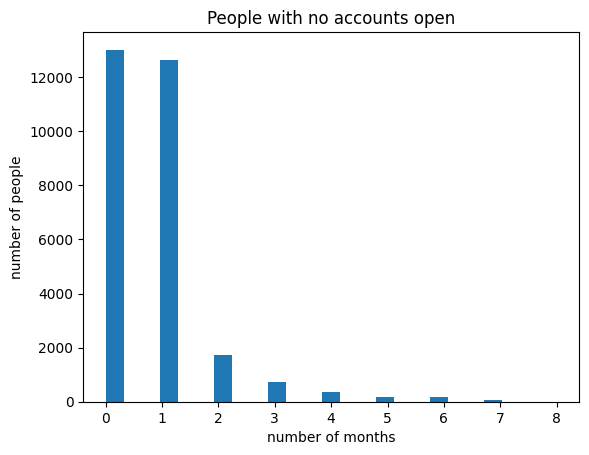

In [54]:
no_acc["true_subscription_months"].plot(kind="hist", bins=25,title="People with no accounts open", ylabel="number of people", xlabel="number of months")

<Axes: title={'center': 'People with accounts open'}, xlabel='number of months', ylabel='number of people'>

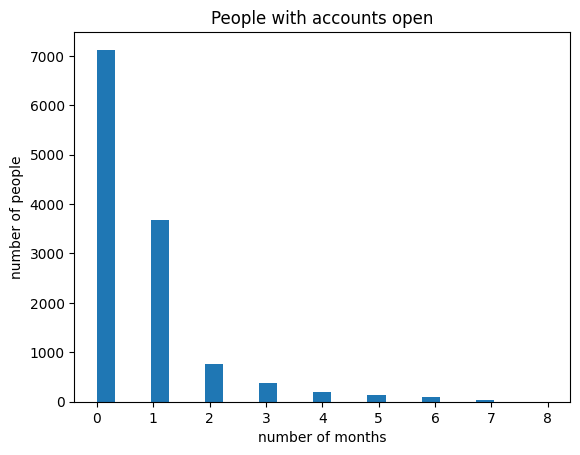

In [55]:
acc["true_subscription_months"].plot(kind="hist", bins=25,title="People with accounts open", ylabel="number of people", xlabel="number of months")

In [56]:
acc_old_ppl = acc_old[(acc_old.subscription_days < 70) & (acc_old.subscription_days > 50)]
no_acc_old_ppl = no_acc_old[(no_acc_old.subscription_days < 70) & (no_acc_old.subscription_days > 50)]
acc_old_ppl["age_segment"].value_counts() / acc_old_ppl["age_segment"].shape[0]

age_segment
18-22    0.350243
26-30    0.156503
31-35    0.131139
23-25    0.107393
36-40    0.093902
41-45    0.068538
46-50    0.045332
51-55    0.017269
56-60    0.011333
0-13     0.006476
65+      0.005936
61-65    0.005936
Name: count, dtype: float64

In [57]:
no_acc_old_ppl["age_segment"].value_counts() / no_acc_old_ppl["age_segment"].shape[0]

age_segment
18-22    0.311272
26-30    0.160116
31-35    0.142052
36-40    0.103035
23-25    0.102168
41-45    0.066618
46-50    0.044364
51-55    0.027746
56-60    0.018786
65+      0.010549
61-65    0.010116
0-13     0.002601
Name: count, dtype: float64

In [58]:
acc_old_ppl1 = acc_old[(acc_old.subscription_days < 50)]
no_acc_old_ppl1 = no_acc_old[(no_acc_old.subscription_days < 50)]

In [59]:
acc_old_ppl1["age_segment"].value_counts() / acc_old_ppl1["age_segment"].shape[0]

age_segment
18-22    0.402540
26-30    0.165364
23-25    0.129946
31-35    0.123107
36-40    0.077430
41-45    0.043967
46-50    0.022472
51-55    0.011969
56-60    0.006595
0-13     0.006595
61-65    0.005129
65+      0.004641
Name: count, dtype: float64

In [60]:
no_acc_old_ppl1["age_segment"].value_counts() / no_acc_old_ppl1["age_segment"].shape[0]

age_segment
18-22    0.355516
26-30    0.156143
31-35    0.131051
23-25    0.119869
36-40    0.090277
41-45    0.059321
46-50    0.035183
51-55    0.021410
56-60    0.011455
61-65    0.007500
65+      0.007364
0-13     0.004227
Name: count, dtype: float64

In [61]:
underage = df[df.age_segment == "0-13"]
underage["true_subscription_months"].describe()

count    93.000000
mean      0.451613
std       0.667834
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       3.000000
Name: true_subscription_months, dtype: float64

<Axes: xlabel='true_subscription_days', ylabel='any_open'>

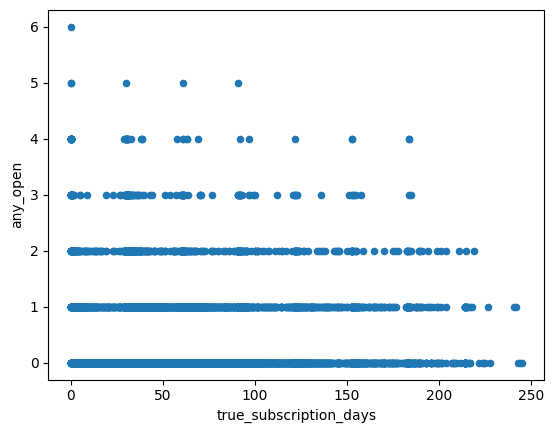

In [62]:
res_df.plot(kind="scatter", x="true_subscription_days", y="any_open")

<Axes: >

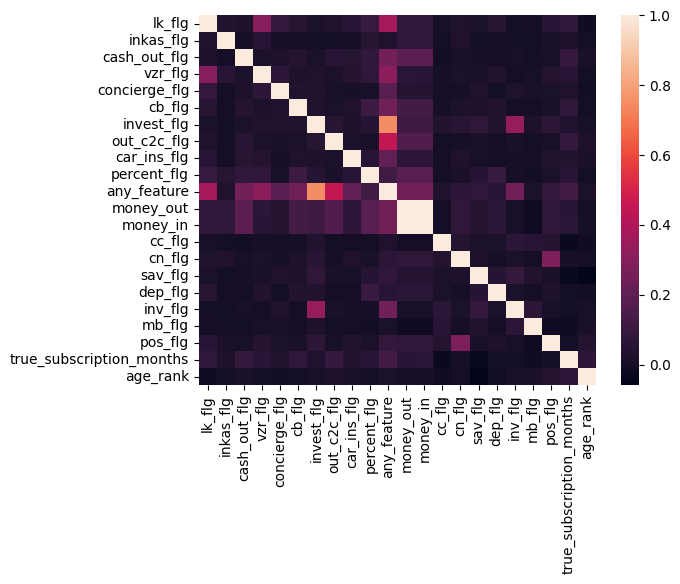

In [63]:
_data = df[[#'Unnamed: 0', 'application_id', 'primary_income_dt', 'party_rk',
       #'product_code', 'account_own_flg', 
       #'sch_flg', 'success_flg',
       #'validation_flg', 'reject_flg', 'account_flg', 'utilization_flg',
       #'ccr_account_first_open_dt', 'dep_account_first_open_dt',
       #'cur_account_first_open_dt', 'sav_account_first_open_dt',
       #'cln_account_first_open_dt', 'pos_account_first_open_dt',
       #'subscription_time', 'channel_desc', 'region_size', 'trial_type',
       #'metall_flg', #'age_segment', 'res_segment', 'open_cc_flg',
       #'util_cc_flg', 'open_cn_flg', 'util_cn_flg', 'open_sav_flg',
       #'util_sav_flg', 'open_dep_flg', 'util_dep_flg', 'open_mb_flg',
       #'util_mb_flg', 'open_inv_flg', 'util_inv_flg', 'in_5ms_cnt',
       #'in_3ms_cnt', 'in_1ms_cnt', 'out_5ms_puc_cnt', 'out_3ms_puc_cnt',
       #'out_1ms_puc_cnt', 'out_5ms_uch_cnt', 'out_3ms_uch_cnt',
       #'out_1ms_uch_cnt', 'out_5ms_all_cnt', 'out_3ms_all_cnt',
       #'out_1ms_all_cnt', 'in_total_5ms_amt', 'in_total_3ms_amt',
       #'in_total_1ms_amt', 'out_total_5ms_amt', 'out_total_3ms_amt',
       #'out_total_1ms_amt', 
       'lk_flg', 'inkas_flg', 'cash_out_flg', 'vzr_flg',
       'concierge_flg', 'cb_flg', 'invest_flg', #'mobile_flg',
       'out_c2c_flg',
       'car_ins_flg', 'percent_flg', 
       #'trial_months', 
       'any_feature',
       'money_out', 'money_in', #'inout', 
       'cc_flg', 'cn_flg', 'sav_flg',
       'dep_flg', 'inv_flg', 'mb_flg', 'pos_flg', #'any_open', #'subscription_days', 'true_subscription_days', 
        'true_subscription_months', 'age_rank']]
numeric_trans = _data.select_dtypes(numerics)
numeric_trans = _data.fillna(0)
corr_trans = _data.corr()
sns.heatmap(corr_trans)

In [64]:
df["any_feature"].corr(df["any_open"])

0.19302858424322694

<Axes: xlabel='true_subscription_days', ylabel='bank_and_feature'>

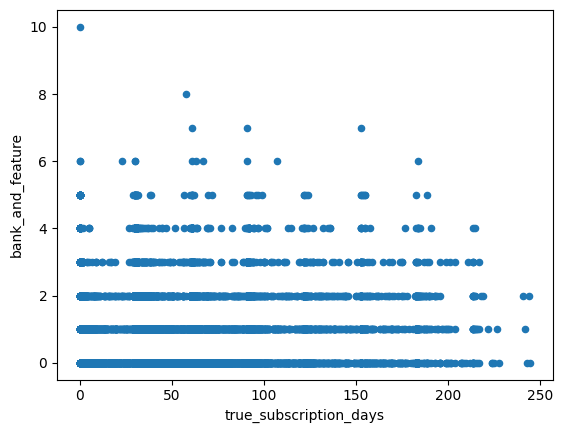

In [65]:
res_df.plot(kind="scatter", x="true_subscription_days", y="bank_and_feature")

In [66]:
res_df["reject_flg"].value_counts()

reject_flg
0    23499
1    17772
Name: count, dtype: int64

In [67]:
df[(df.true_subscription_days > 200) & (df.bank_and_feature == 0)]

,Unnamed: 0,application_id,primary_income_dt,party_rk,product_code,account_own_flg,sch_flg,success_flg,validation_flg,reject_flg,account_flg,utilization_flg,ccr_account_first_open_dt,dep_account_first_open_dt,cur_account_first_open_dt,sav_account_first_open_dt,cln_account_first_open_dt,pos_account_first_open_dt,subscription_time,channel_desc,region_size,trial_type,metall_flg,age_segment,res_segment,open_cc_flg,util_cc_flg,open_cn_flg,util_cn_flg,open_sav_flg,util_sav_flg,open_dep_flg,util_dep_flg,open_mb_flg,util_mb_flg,open_inv_flg,util_inv_flg,in_5ms_cnt,in_3ms_cnt,in_1ms_cnt,out_5ms_puc_cnt,out_3ms_puc_cnt,out_1ms_puc_cnt,out_5ms_uch_cnt,out_3ms_uch_cnt,out_1ms_uch_cnt,out_5ms_all_cnt,out_3ms_all_cnt,out_1ms_all_cnt,in_total_5ms_amt,in_total_3ms_amt,in_total_1ms_amt,out_total_5ms_amt,out_total_3ms_amt,out_total_1ms_amt,lk_flg,inkas_flg,cash_out_flg,vzr_flg,concierge_flg,cb_flg,invest_flg,mobile_flg,out_c2c_flg,car_ins_flg,percent_flg,any_feature,money_out,money_in,inout,trial_months,cc_flg,cn_flg,sav_flg,dep_flg,inv_flg,mb_flg,pos_flg,any_open,bank_and_feature,subscription_days,true_subscription_days,true_subscription_months,age_rank
3578,3578,5ae55a6c3e7646e89fee84d3dd1f91fa,2023-03-24,808475593.0,DCV,1,1,1,0,0,1,1,2023-03-24,2023-10-31,2022-02-28,2022-03-29,NaT,NaT,2.127665e+07,МБ,ГОРОД,1 mon,1,Пусто,РФ,1,0,0,0,0,0,0,0,0,0,0,0,110,78.0,52.0,660,499.0,316.0,21,13.0,10.0,92,61.0,43.0,708893.20,512694.12,414018.49,729742.97,544110.48,417184.71,0,0,0,0,0,0,0,0,0,0,0,0,729742.97,708893.20,1.029412,1.0,0,0,0,0,0,0,0,0,0,246.0,216.0,7.0,14.0
6352,6352,4629a27c6a8c4b4aabfb331c552d902e,2023-03-15,976562794.0,DCV,1,1,1,0,0,1,1,NaT,NaT,2021-01-14,NaT,NaT,NaT,2.055404e+07,Web,СЕЛО,1 mon,0,Пусто,Пусто,0,0,0,0,0,0,0,0,0,0,1,0,27,27.0,27.0,0,0.0,0.0,3,3.0,3.0,18,18.0,18.0,1371920.50,1371920.50,1371920.50,1371673.36,1371673.36,1371673.36,0,0,0,0,0,0,0,0,0,0,0,0,1371673.36,1371920.50,0.999820,1.0,0,0,0,0,0,0,0,0,0,237.0,207.0,7.0,14.0
7520,7520,4972ba202f0a44fe9ba87d9a4f4ccd04,2023-03-30,971738705.0,DCV,1,1,1,0,0,1,1,NaT,NaT,2023-02-15,2023-08-31,NaT,NaT,2.022157e+07,МБ,СЕЛО,1 mon,1,18-22,РФ,0,0,0,0,0,0,0,0,0,0,0,0,19,19.0,19.0,35,35.0,35.0,3,3.0,3.0,33,33.0,33.0,54604.53,54604.53,54604.53,53480.89,53480.89,53480.89,0,0,0,0,0,0,0,0,0,0,0,0,53480.89,54604.53,0.979422,1.0,0,0,0,0,0,0,0,0,0,234.0,204.0,7.0,3.0
9045,9045,df93c2a533384d9ab1ae61d853d0d300,2023-03-01,867263620.0,DCV,1,1,0,0,1,1,0,NaT,NaT,2022-06-21,NaT,NaT,NaT,2.116792e+07,МБ,неизвестно,1 mon,1,18-22,РФ,0,0,0,0,0,0,0,0,0,0,0,0,891,640.0,324.0,1154,865.0,533.0,0,0.0,0.0,272,218.0,152.0,2122419.47,1626558.97,916607.65,2127053.05,1631411.64,933253.91,0,0,0,0,0,0,0,0,0,0,0,0,2127053.05,2122419.47,1.002183,1.0,0,0,0,0,0,0,0,0,0,244.0,214.0,7.0,3.0
10553,10553,ba9ddf342e3d4c5c98e82a4915f7b025,2023-03-08,911006752.0,DCV,1,1,1,0,0,1,1,2022-11-10,NaT,2022-10-17,2022-12-10,NaT,NaT,2.206393e+07,МБ,ГОРОД-МИЛЛИОННИК,1 mon,1,65+,РФ,0,0,0,0,0,0,0,0,0,0,0,0,824,671.0,351.0,719,611.0,350.0,31,22.0,11.0,306,230.0,132.0,2089402.09,1759102.44,942706.66,2088988.37,1763411.25,942612.85,0,0,0,0,0,0,0,0,0,0,0,0,2088988.37,2089402.09,0.999802,1.0,0,0,0,0,0,0,0,0,0,255.0,225.0,8.0,13.0
19546,19546,89c9a5ec41cf4b18a5d77cb8d909e38b,2023-03-04,539704973.0,DCV,1,1,1,0,0,1,1,2021-09-06,NaT,2020-09-21,2022-02-21,NaT,NaT,2.116800e+07,Web,САНКТ-ПЕТЕРБУРГ,1 mon,1,26-30,РФ,0,0,0,0,0,0,0,0,0,0,0,0,737,506.0,290.0,770,576.0,366.0,16,11.0,6.0,253,177.0,121.0,2746456.16,2286946.74,1269650.84,2757125.05,2300594.50,1266923.35,0,0,0,0,0,0,0,0,0,0,0,0,2757125.05,2746456.16,1.003885,1.0,0,0,0,0,0,0,0,0,0,244.0,214.0,7.0,5.0
25138,25138,0e5f7acf75594ec5ad3dfbad88d355d1,2023-03-15,649702547.0,DCV,1,1,1,0,0,1,0,2021-04-25,NaT,2021-04-26,2022-04-27,2023-04-03,NaT,2.123935e+07,МБ,СЕЛО,1 mon,1,41-45,РФ,0,0,1,0,0,0,0,0,1,0,0,0,213,157.0,109.0,19,17.0,16.0,1,1.0,1.0,57,44.0,29.0,223688.25,161116.44,105400.50,223062.82,164339.72,105076.46,0,0,0,0,0,0,0,0,0,0,0,0,223062.82,223688.25,0.997204,1.0,0,0,0,0,0,0,0,0,0,245.0,215.0,7.0,8.0

<Axes: title={'center': 'Russian clients'}, xlabel='number of days', ylabel='number of people'>

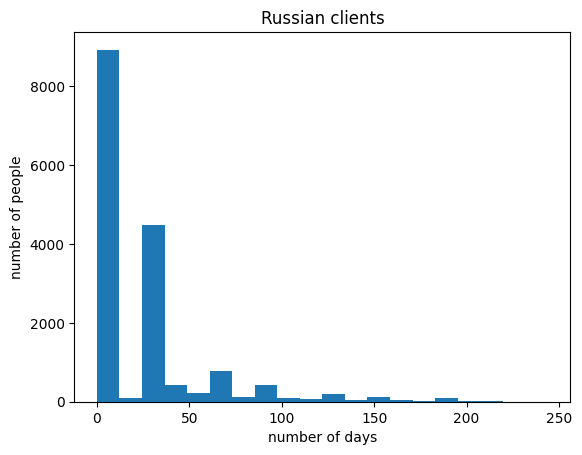

In [68]:
use_df = df[df.bank_and_feature > 0]
no_use_df = df[df.bank_and_feature == 0]
use_df['true_subscription_days'].plot(kind="hist",bins=20, title="Russian clients", ylabel="number of people", xlabel="number of days")



<Axes: title={'center': 'Russian clients'}, xlabel='number of days', ylabel='number of people'>

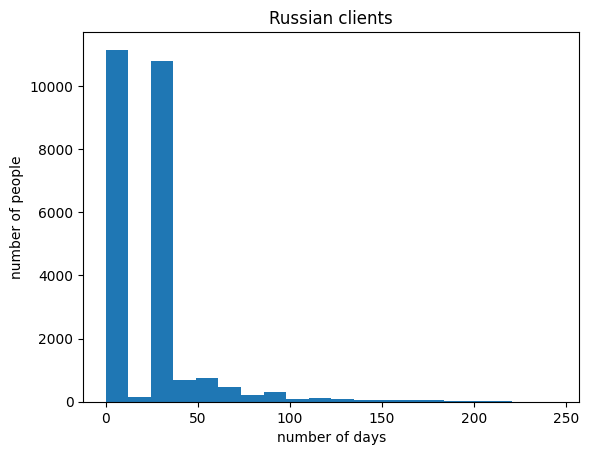

In [69]:
no_use_df['true_subscription_days'].plot(kind="hist",bins=20, title="Russian clients", ylabel="number of people", xlabel="number of days")

In [70]:
no_use_df['true_subscription_days'].describe()

count    25059.000000
mean        22.580829
std         27.538270
min          0.000000
25%          0.000000
50%         30.000000
75%         31.000000
max        245.000000
Name: true_subscription_days, dtype: float64

In [71]:
use_df['true_subscription_days'].describe()

count    16212.000000
mean        23.320688
std         35.881076
min          0.000000
25%          0.000000
50%          0.000000
75%         31.000000
max        244.000000
Name: true_subscription_days, dtype: float64

<Axes: >

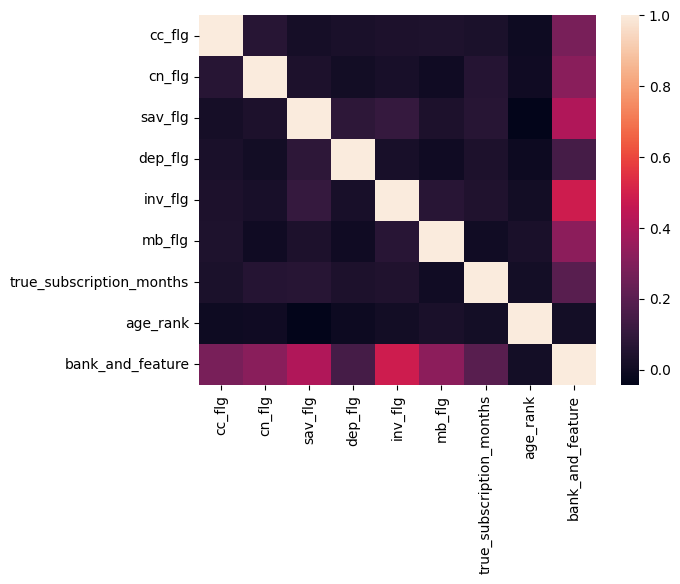

In [142]:
using_data = df[[#'Unnamed: 0', 'application_id', 'primary_income_dt', 'party_rk',
       #'product_code', 'account_own_flg', 
       #'sch_flg', 'success_flg',
       #'validation_flg', 'reject_flg', 'account_flg', 'utilization_flg',
       #'ccr_account_first_open_dt', 'dep_account_first_open_dt',
       #'cur_account_first_open_dt', 'sav_account_first_open_dt',
       #'cln_account_first_open_dt', 'pos_account_first_open_dt',
       #'subscription_time', 'channel_desc', 'region_size', 'trial_type',
       #'metall_flg', #'age_segment', 'res_segment', 'open_cc_flg',
       #'util_cc_flg', 'open_cn_flg', 'util_cn_flg', 'open_sav_flg',
       #'util_sav_flg', 'open_dep_flg', 'util_dep_flg', 'open_mb_flg',
       #'util_mb_flg', 'open_inv_flg', 'util_inv_flg', 'in_5ms_cnt',
       #'in_3ms_cnt', 'in_1ms_cnt', 'out_5ms_puc_cnt', 'out_3ms_puc_cnt',
       #'out_1ms_puc_cnt', 'out_5ms_uch_cnt', 'out_3ms_uch_cnt',
       #'out_1ms_uch_cnt', 'out_5ms_all_cnt', 'out_3ms_all_cnt',
       #'out_1ms_all_cnt', 'in_total_5ms_amt', 'in_total_3ms_amt',
       #'in_total_1ms_amt', 'out_total_5ms_amt', 'out_total_3ms_amt',
       #'out_total_1ms_amt', 
       #'lk_flg', 'inkas_flg', 'cash_out_flg', 'vzr_flg',
       #'concierge_flg', 'cb_flg', 'invest_flg', 
       #'mobile_flg', 'out_c2c_flg',
       #'car_ins_flg', 'percent_flg', 
       #'trial_months', 
       #'any_feature',
       #'money_out', 'money_in', #'inout', 
       'cc_flg', 'cn_flg', 'sav_flg',
       'dep_flg', 'inv_flg', 'mb_flg', #'pos_flg', #'any_open', #'subscription_days', 'true_subscription_days', 
        'true_subscription_months', 'age_rank', 'bank_and_feature']].copy()
using_data = using_data[using_data.true_subscription_months > 0]
t_numeric_trans = using_data.select_dtypes(numerics)
t_numeric_trans = using_data.fillna(0)
t_corr_trans = t_numeric_trans.corr()
sns.heatmap(t_corr_trans)

In [73]:
regr_df = df.copy()
regr_df = regr_df[regr_df.true_subscription_months > 0]

X = regr_df[['cc_flg', 'cn_flg', 'sav_flg',
            'dep_flg', 'inv_flg', 'mb_flg', 'pos_flg']]
y = regr_df['true_subscription_months']

regr = linear_model.LinearRegression()
regr.fit(X.values, y)

LinearRegression()

In [74]:
regr.coef_

array([ 0.13057355,  0.30916563,  0.22768637,  0.60682218,  0.18242221,
       -0.01012205,  0.21749814])

In [75]:
regr.intercept_

1.392231310543616

In [76]:
regr.predict([[1, 1, 1, 1, 1, 1, 1]])

array([3.05627734])

In [77]:
regr_df["true_subscription_months"].describe()

count    21129.000000
mean         1.444129
std          1.021732
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: true_subscription_months, dtype: float64

In [78]:
regr_df["true_subscription_months"].value_counts()

true_subscription_months
1.0    16313
2.0     2508
3.0     1120
4.0      538
5.0      318
6.0      250
7.0       74
8.0        8
Name: count, dtype: int64

In [135]:
ks = [0.13057355,  0.30916563,  0.22768637,  0.60682218,  0.18242221, -0.01012205,  0.21749814, 1.392231310543616]
res_flags = ['util_cc_flg', 'util_cn_flg', 'util_sav_flg', 'util_dep_flg', 'util_inv_flg', 'util_mb_flg', 'pos_flg',
             'open_cc_flg', 'open_cn_flg', 'open_sav_flg', 'open_dep_flg', 'open_inv_flg', 'open_mb_flg']
flags = res_flags + ['pos_flg', 'mean']
bar_colors = ['tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:red']
#fig, ax = plt.pyplot.subplots()
#ax.bar(flags, ks,color=bar_colors)
#ax.set_title("Coefficients")

In [222]:
def get_p_values(flags, n, df, use_min=True):
    p_values = {}
    for i in flags:
        s1 = df[df[i] == 1]
        s2 = df[df[i] == 0]
        calc_pval = True
        if n - len(s1) > 1000 or n-len(s2) > 1000:
            if not use_min:
                calc_pval = False
            else:
                n = min(len(s1), len(s2))
        p_values[i] = stats.ttest_ind(a=s1['true_subscription_months'].head(n), b=s2['true_subscription_months'].head(n), 
                                      equal_var=False).pvalue
    return p_values

slices = {}


for i in res_flags:
    s1 = df[df[i] == 1]
    s2 = df[df[i] != 1]
    slices[i] = [s1, s2]

#fig1, axs = plt.pyplot.subplots(4,len(res_flags)//2, figsize=(16, 21))
#axs = axs.ravel()
k = 0
for i in slices.keys():
    #slices[i][0]['true_subscription_months'].plot(kind="hist",bins=20, title=i, ylabel="number of people", xlabel="number of months", 
    #                                            ax=axs[k])
    #slices[i][1]['true_subscription_months'].plot(kind="hist",bins=20, title="no "+i, ylabel="number of people", xlabel="number of months", 
    #                                            ax=axs[k+1])
    print(slices[i][0]['true_subscription_months'].var(), slices[i][1]['true_subscription_months'].var())
    k += 2


1.158869776655964 1.0498501964461548
1.6758349860450215 1.0410242658025854
1.2439792830906455 1.035739756591749
2.0143869671003913 1.0523510072764177
1.2949074938488285 1.0420972748821724
0.9872090575432239 1.0603042991089715
1.4127632282141704 1.0149665711346818
1.0764382005442164 1.0526019551810077
1.6271097985335445 1.0392247507541565
1.166501687420513 1.037188093094954
2.053495440729483 1.0521543440760894
0.9611869747310543 1.0691183680759517
0.984368405287202 1.0629400887955802


In [223]:
get_p_values(res_flags, 30000, df)

{'util_cc_flg': 0.006200226658266051,
 'util_cn_flg': 0.02227579143963626,
 'util_sav_flg': 0.029306297419260195,
 'util_dep_flg': 0.32363440888265793,
 'util_inv_flg': 0.12458624204740111,
 'util_mb_flg': 0.7299575304702665,
 'pos_flg': 0.7741590337623018,
 'open_cc_flg': 0.34469395789375257,
 'open_cn_flg': 0.02492652327915853,
 'open_sav_flg': 0.05345656388845209,
 'open_dep_flg': 0.278844211751047,
 'open_inv_flg': 0.9498904753657864,
 'open_mb_flg': 0.9459387496476865}

In [155]:
regr_df1 = df[df.true_subscription_months > 0]

X1 = regr_df[['util_cc_flg', 'util_sav_flg', 'lk_flg', 'inkas_flg', 'cash_out_flg', 'vzr_flg',
'concierge_flg', 'cb_flg', 'invest_flg',  'out_c2c_flg', 'car_ins_flg', 'percent_flg']]
y1 = regr_df['true_subscription_months']

regr1 = linear_model.LinearRegression()
regr1.fit(X1.values, y1)

LinearRegression()

In [156]:
regr1.coef_

array([0.13385938, 0.15685488, 0.72627163, 1.91344306, 0.75611267,
       0.22450694, 0.40555021, 0.91183826, 0.2664685 , 0.4249594 ,
       0.29844698, 0.79262406])

In [157]:
regr1.intercept_

1.3431543199925122

In [158]:
sum(regr1.coef_)

7.010935961288947

In [149]:
df['bank_and_feature'].value_counts()

bank_and_feature
0     25059
1     10650
2      3875
3      1246
4       348
5        77
6        11
7         3
8         1
10        1
Name: count, dtype: int64

In [204]:
feat_flags = ['lk_flg', 'cash_out_flg', 'vzr_flg',
'concierge_flg', 'cb_flg', 'invest_flg', 'out_c2c_flg',
'car_ins_flg', 'percent_flg']
get_p_values(feat_flags, 1100, df)

{'lk_flg': 3.1795149513738345e-22,
 'cash_out_flg': 8.214254677428342e-24,
 'vzr_flg': 2.291577776659168e-13,
 'concierge_flg': 0.0003436900413516413,
 'cb_flg': 1.1074308005912394e-17,
 'invest_flg': 0.00019657174312938568,
 'out_c2c_flg': 6.848473250197014e-29,
 'car_ins_flg': 1.365613782691535e-07,
 'percent_flg': 1.341968794081623e-10}

In [168]:
df["party_rk"].value_counts()

party_rk
5.892592e+08    2
1.012726e+09    2
5.592751e+08    2
5.152442e+08    2
7.904933e+08    2
               ..
8.995708e+08    1
5.475136e+08    1
9.620373e+08    1
7.520852e+08    1
3.929128e+08    1
Name: count, Length: 41264, dtype: int64

In [169]:
df.shape

(41271, 84)

In [170]:
df["inkas_flg"].value_counts()

inkas_flg
0    41270
1        1
Name: count, dtype: int64

In [214]:
total_flags = res_flags + feat_flags + ["inkas_flg"]

In [216]:
for i in total_flags:
    print(i, len(df[df[i] == 1]))

util_cc_flg 1813
util_cn_flg 942
util_sav_flg 3679
util_dep_flg 138
util_inv_flg 2196
util_mb_flg 2766
pos_flg 4210
open_cc_flg 2377
open_cn_flg 1147
open_sav_flg 5395
open_dep_flg 141
open_inv_flg 5344
open_mb_flg 4073
lk_flg 601
cash_out_flg 335
vzr_flg 312
concierge_flg 103
cb_flg 291
invest_flg 5073
out_c2c_flg 1365
car_ins_flg 195
percent_flg 353
inkas_flg 1
